# 成為資料分析師 | Python 與資料科學應用

> NumPy 101：實踐科學計算的 Python 套件

## 郭耀仁

## 大綱

- 為什麼資料分析師需要 NumPy
- NumPy 基礎
- 陣列處理
- 陣列運算
- 延伸閱讀
- 作業

## 為什麼資料分析師需要 NumPy

## 隨堂練習：1 公里是 0.62137 英里，將這幾個長跑距離（公里）轉換為英里

In [1]:
distances = [1, 1.6, 3, 5, 10, 21.097, 42.195]

In [2]:
# conventional
dist_in_mile = []
for d in distances:
    dist_in_mile.append(d * 0.62137)

In [3]:
print(dist_in_mile)

[0.62137, 0.994192, 1.86411, 3.1068499999999997, 6.213699999999999, 13.10904289, 26.21870715]


In [4]:
# list comprehension
dist_in_mile = [d * 0.62137 for d in distances]
print(dist_in_mile)

[0.62137, 0.994192, 1.86411, 3.1068499999999997, 6.213699999999999, 13.10904289, 26.21870715]


In [5]:
# generator
dist_in_mile = (d * 0.62137 for d in distances)
print(list(dist_in_mile))

[0.62137, 0.994192, 1.86411, 3.1068499999999997, 6.213699999999999, 13.10904289, 26.21870715]


In [6]:
# lambda expression + map
dist_in_mile = list(map(lambda d : d * 0.62137, distances))
print(dist_in_mile)

[0.62137, 0.994192, 1.86411, 3.1068499999999997, 6.213699999999999, 13.10904289, 26.21870715]


## 隨堂練習：計算 A 與 B 的內積 C

$$
C_{i, j} = \sum{A_{i, k}B_{k, j}}
$$

In [7]:
A = [
    [1, 2],
    [4, 5]
]
B = [
    [4, 3],
    [2, 1]
]
# C = ?

In [8]:
# C is 2X2
C = [
    [0, 0],
    [0, 0]
]
I = len(A)
K = len(A[0])
J = len(B[0])

for i in range(I):
    for k in range(K):
        for j in range(J):
            C[i][j] += A[i][k] * B[k][j]

In [9]:
print(C)

[[8, 5], [26, 17]]


## 讓內積更 Generalized

In [10]:
def get_mat_dot(A, B):
    I = len(A)
    K_A = len(A[0])
    K_B = len(B)
    J = len(B[0])
    if K_A != K_B:
        raise ValueError("shapes ({},{}) and ({},{}) not aligned: {} (dim 1) != {} (dim 0)".format(I, K_A, K_B, J, K_A, K_B))
    C = [[0 for j in range(J)] for i in range(I)]
    for i in range(I):
        for k in range(K_A):
            for j in range(J):
                C[i][j] += A[i][k] * B[k][j]
    return C

In [11]:
A = [
    [1, 2],
    [4, 5]
]
B = [
    [4, 3],
    [2, 1]
]

get_mat_dot(A, B)

[[8, 5], [26, 17]]

In [12]:
A = [
    [1, 2],
    [4, 5]
]
B = [
    [4, 3],
    [2, 1],
    [4, 9]
]

get_mat_dot(A, B)

ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

## 在科學計算使用者眼裡

- 以純量（scalar）作為運算單位還是太麻煩
- 哪些程式語言內建了 Vectorization（向量化）功能？
    - Matlab
    - R
    - Julia
    - ...etc.

## NumPy to the Rescue!

## 如何將這幾個長跑距離（公里）轉換為英里？

In [13]:
import numpy as np

distances = [1, 1.6, 3, 5, 10, 21.097, 42.195]
distances = np.array(distances)
dist_in_mile = distances * 0.62137
print(dist_in_mile)

[ 0.62137     0.994192    1.86411     3.10685     6.2137     13.10904289
 26.21870715]


## 如何計算 A 與 B 的內積 C？

In [14]:
import numpy as np

A = [
    [1, 2],
    [4, 5]
]
B = [
    [4, 3],
    [2, 1]
]
A = np.array(A)
B = np.array(B)
C = A.dot(B)
print(C)

[[ 8  5]
 [26 17]]


## NumPy 基礎

## 什麼是 NumPy

> NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

## NumPy: Numerical Python

創建一種稱為 ndarray 的類別，彌補了原生 list 缺少的向量化運算（vectorization）功能

## ndarray 類別與 `list` 的差異

> At the core of the NumPy package, is the ndarray object. This encapsulates n-dimensional arrays of homogeneous data types, with many operations being performed in compiled code for performance.

- 僅能容納相同的資料類型
- 具有特殊的索引功能：fancy indexing/boolean indexing

## 安裝與載入 NumPy

- 安裝

```bash
# run in bash shell
pip install numpy
```

- 載入

```py
# run in python console
import numpy as np
```

## 如何創建 ndarray

- 使用 `np.array()` 函數由既有的 list 轉換而成
- 使用多樣式的 NumPy 函數直接創建

## 使用 `np.array()` 函數由既有的 list 轉換而成

In [15]:
import numpy as np

homogeneous_list = [1, 2, 3, 4, 5]
print(type(homogeneous_list))
arr = np.array(homogeneous_list)
print(type(arr))
print(arr)
print(arr.dtype)

<class 'list'>
<class 'numpy.ndarray'>
[1 2 3 4 5]
int64


## 可以搭配 `dtype` 參數指定資料型態

- `int` ：可指定 8 到 64 位元的整數型態
- `float` ：可指定 16 到 64 位元的浮點數型態
- `bool` ：布林型態

In [16]:
import numpy as np

homogeneous_list = [1, 2, 3, 4, 5]
arr = np.array(homogeneous_list, dtype=int)
print(arr.dtype)
arr = np.array(homogeneous_list, dtype=float)
print(arr.dtype)

int64
float64


## 常見創建陣列錯誤

In [17]:
#arr = np.array(1, 2, 3, 4)    # WRONG
arr = np.array([1, 2, 3, 4])  # RIGHT

## 使用多樣式的 NumPy 函數直接創建

- `np.zeros(shape)` 創建指定外觀充滿 0 的數值陣列
- `np.ones(shape)` 創建指定外觀充滿 1 的數值陣列
- `np.full(shape, fill_value)` 創建指定外觀充滿 fill_value 的數值陣列
- `np.arange(start, stop, step)` 創建從 start （包含）間隔 step 至 stop （不包含）的等差數列，使用方式同內建函數 `range()`
- `np.linspace(start, stop, num)` 創建從 start （包含）至 stop （包含）的均勻切割為 num 個資料點的數值陣列
- `np.random.random(size)` 創建指定外觀介於 0, 1 之間、並符合均勻分佈的數值陣列
- `np.random.normal(loc, scale, size)` 創建指定外觀以 loc 為平均數、 scale 為標準差常態分佈的數值陣列
- `np.random.randint(low, high, size)` 創建指定外觀於 low （包含）到 high （不包含）之間隨機抽樣之正整數的數值陣列

## 使用多樣式的 NumPy 函數直接創建

- `np.zeros(shape)`
- `np.ones(shape)`
- `np.full(shape, fill_value)`

In [18]:
import numpy as np

print(np.zeros(5, dtype=int))
print(np.ones((2, 2), dtype=float))
print(np.full((2, 2), 5566, dtype=int))

[0 0 0 0 0]
[[1. 1.]
 [1. 1.]]
[[5566 5566]
 [5566 5566]]


## 使用多樣式的 NumPy 函數直接創建

- `np.arange(start, stop, step)` 創建從 start （包含）間隔 step 至 stop （不包含）的等差數列，使用方式同內建函數 `range()`
- `np.linspace(start, stop, num)` 創建從 start （包含）至 stop （包含）的均勻切割為 num 個資料點的數值陣列

In [19]:
import numpy as np

print(np.arange(1, 10, 2))
print(np.linspace(1, 9, 5, dtype=int))

[1 3 5 7 9]
[1 3 5 7 9]


## 使用多樣式的 NumPy 函數直接創建

- `np.random.random(size)`
- `np.random.normal(loc, scale, size)`
- `np.random.randint(low, high, size)`

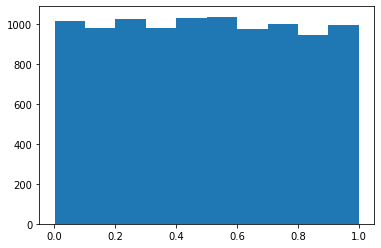

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

arr = np.random.random(10000)
fig = plt.figure()
ax = plt.axes()
ax.hist(arr)
plt.show()

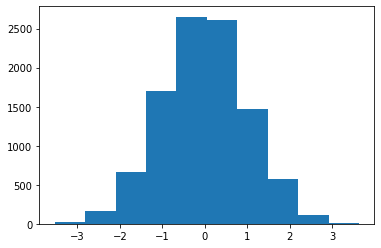

In [21]:
arr = np.random.normal(0, 1, 10000)
fig = plt.figure()
ax = plt.axes()
ax.hist(arr)
plt.show()

In [22]:
print(np.random.randint(1, 7, size=6))

[1 2 1 5 1 6]


## 陣列處理

## ndarray 的屬性

- `arr.ndim` ：檢視 arr 有幾個維度
- `arr.shape` ：檢視 arr 的外型
- `arr.size` ：檢視 arr 的資料筆數，對一維陣列的意涵就像內建函數 `len()` 作用在 list 上一般
- `arr.dtype` ：檢視 arr 中同質資料的型態

In [23]:
import numpy as np

zero_d = np.array(5566)            # 零維陣列，純量
one_d = np.array([55, 66, 5566])   # 一維陣列
two_d = np.ones((3, 3), dtype=int) # 二維陣列
print("ndim:")
print(zero_d.ndim)
print(one_d.ndim)
print(two_d.ndim)
print("shape:")
print(zero_d.shape)
print(one_d.shape)
print(two_d.shape)
print("size:")
print(zero_d.size)
print(one_d.size)
print(two_d.size)
print("dtype:")
print(zero_d.dtype)
print(one_d.dtype)
print(two_d.dtype)

ndim:
0
1
2
shape:
()
(3,)
(3, 3)
size:
1
3
9
dtype:
int64
int64
int64


## ndarray 較少被檢視的屬性

- `arr.itemsize` 檢視 arr 中每一筆資料所使用的位元組（bytes）多寡
- `arr.nbytes` 檢視 arr 整個物件所使用的位元組（bytes）多寡，一般來說我們期待 arr.nbytes = arr.itemsize x arr.size

In [24]:
import numpy as np

arr = np.arange(1, 6)
print(arr.dtype) # 64 bits
print(arr.itemsize) # 8 bytes = 64 bits
print(arr.itemsize * arr.size)
print(arr.nbytes)

int64
8
40
40


## ndarray 的索引（indexing）

從 ndarray 中取出單個資料值的方式與 list 相同，使用 `arr[INDEX]` 取值

In [25]:
import numpy as np

arr = np.array([55, 66, 56, 5566])
print("From start to stop:")
print(arr[0])
print(arr[1])
print(arr[2])
print(arr[arr.size - 1])
print("From stop to start:")
print(arr[-1])
print(arr[-2])
print(arr[-3])
print(arr[-arr.size])

From start to stop:
55
66
56
5566
From stop to start:
5566
56
66
55


## 面對二維以上的陣列，ndarray 支援使用 `[i, j, …]` 的方式取出位於第 i 列（row）、第 j 欄（column）… 的資料

In [26]:
import numpy as np

np.random.seed(42)
arr = np.random.randint(1, 10, size=(3, 4))
print(arr)
print(arr[1, 1]) # 3 located at (1, 1)
print(arr[2, -3]) # 4 located at (2, -3)

[[7 4 8 5]
 [7 3 7 8]
 [5 4 8 8]]
3
4


## ndarray 的索引與 list 同樣具有更新的特性，值得注意的是由於同質資料緣故，更新資料會被隱性地轉換型態

In [27]:
import numpy as np

np.random.seed(42)
arr = np.random.randint(1, 10, size=(3, 4))
print(arr)
arr[2, 3] = 5566
print(arr)
arr[2, 3] = 55.66
print(arr)
arr[2, 3] = False
print(arr)

[[7 4 8 5]
 [7 3 7 8]
 [5 4 8 8]]
[[   7    4    8    5]
 [   7    3    7    8]
 [   5    4    8 5566]]
[[ 7  4  8  5]
 [ 7  3  7  8]
 [ 5  4  8 55]]
[[7 4 8 5]
 [7 3 7 8]
 [5 4 8 0]]


## ndarray 的切割（slicing）

與 list 相同，使用 `arr[start:stop:step]` 取出陣列的片段

In [28]:
import numpy as np

arr = np.arange(10, 20)
print(arr[::]) # all defaults
print(arr[::2]) # step=2
print(arr[:5]) # stop=5, exclusive
print(arr[5:]) # start=5, inclusive
print(arr[::-1]) # step=-1, reverse

[10 11 12 13 14 15 16 17 18 19]
[10 12 14 16 18]
[10 11 12 13 14]
[15 16 17 18 19]
[19 18 17 16 15 14 13 12 11 10]


## ndarray 特別的索引

- 華麗索引（Fancy indexing）
- 布林索引（Boolean indexing）

## 華麗索引（Fancy indexing）指的是以陣列傳入不規則的索引值選取資料值，不用遷就 `arr[start:stop:step]` 的規則

In [29]:
import numpy as np

np.random.seed(0)
arr = np.random.randint(1, 100, size=(10))
odd_indices =  [0, 2, 8]
print(arr)
print(arr[odd_indices])

[45 48 65 68 68 10 84 22 37 88]
[45 65 37]


## 布林索引（Boolean indexing）指的是以外觀相同的陣列傳入布林值，將位置為 True 的資料篩選出來

In [30]:
import numpy as np

np.random.seed(0)
arr = np.random.randint(1, 100, size=(10))
is_odd = arr % 2 == 1
print(arr)
print(is_odd)
print(arr[is_odd])

[45 48 65 68 68 10 84 22 37 88]
[ True False  True False False False False False  True False]
[45 65 37]


## 重塑外觀

- `arr.reshape(m, n, ...)` 將數值陣列重塑成運算所需要的外觀
- `arr.ravel()` 將外觀為 (m, n, …) 的數值陣列調整回一維

In [31]:
# reshape
import numpy as np

arr = np.arange(1, 10)
print(arr)
print(arr.shape)
print(arr.reshape(3, 3))
print(arr.reshape(3, 3).shape)

[1 2 3 4 5 6 7 8 9]
(9,)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)


In [32]:
# reshape conveniently
import numpy as np

arr = np.arange(1, 10)
print(arr.reshape(3, -1))
print(arr.reshape(-1, 3))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [33]:
import numpy as np

arr = np.arange(1, 10).reshape(3, 3)
print(arr.shape)
print(arr.ndim)
print(arr.ravel().shape)
print(arr.ravel().ndim)

(3, 3)
2
(9,)
1


## 印出陣列

- 陣列如果太巨大，NumPy 會自動忽略中間的資訊
- 可以利用 `np.set_printoptions(threshold=)` 印出更多內容

In [34]:
print(np.arange(10000))
print(np.arange(10000).reshape(100,100))

[   0    1    2 ... 9997 9998 9999]
[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]


In [35]:
# 還原預設值
#np.set_printoptions(edgeitems=3,infstr='inf',
#                    linewidth=75, nanstr='nan', precision=8,
#                    suppress=False, threshold=1000, formatter=None)

## 複製陣列

ndarray 有一個重要的預設特性稱為「不複製」，因此不論在切割或重新宣告的情境中都是創建陣列的 View，而非複製另一個陣列，這代表著對以 View 型式存在的子陣列（Sub-array）更新會改動到原始陣列

In [36]:
import numpy as np

arr = np.arange(1, 10)
mat = arr.reshape(3, 3)
mat[1, 1] = 5566
print(mat)
print(arr)

[[   1    2    3]
 [   4 5566    6]
 [   7    8    9]]
[   1    2    3    4 5566    6    7    8    9]


## 若希望實踐陣列的複製，可以運用其 .copy() 方法

In [37]:
import numpy as np

arr = np.arange(1, 10)
mat = arr.copy()
mat = mat.reshape(3, 3)
mat[1, 1] = 5566
print(mat)
print(arr)

[[   1    2    3]
 [   4 5566    6]
 [   7    8    9]]
[1 2 3 4 5 6 7 8 9]


## 合併陣列

- `np.concatenate([arr0, arr1, ...], axis)`
- `np.vstack([arr0, arr1, ...])`
- `np.hstack([arr0, arr1, ...])`

In [38]:
import numpy as np

upper_arr = np.arange(1, 5).reshape(2, 2)
lower_arr = np.arange(5, 9).reshape(2, 2)
print("Merge with np.concatenate():")
print(np.concatenate([upper_arr, lower_arr])) # default axis=0
print("Merge with np.vstack():")
print(np.vstack([upper_arr, lower_arr]))

Merge with np.concatenate():
[[1 2]
 [3 4]
 [5 6]
 [7 8]]
Merge with np.vstack():
[[1 2]
 [3 4]
 [5 6]
 [7 8]]


## 當 `axis=1` 的時候效果與 `np.hstack()` 函數相同，是以水平方向進行合併

In [39]:
import numpy as np

left_arr = np.zeros(4, dtype=int).reshape(-1, 1)
right_arr = np.ones(4, dtype=int).reshape(-1, 1)
print("Merge with np.concatenate():")
print(np.concatenate([left_arr, right_arr], axis=1))
print("Merge with np.hstack():")
print(np.hstack([left_arr, right_arr]))

Merge with np.concatenate():
[[0 1]
 [0 1]
 [0 1]
 [0 1]]
Merge with np.hstack():
[[0 1]
 [0 1]
 [0 1]
 [0 1]]


## 拆分陣列

- `np.split()`
- `np.vsplit()`
- `np.hsplit()`

In [40]:
import numpy as np

arr = np.arange(11, 21)
arr0, arr1, arr2 = np.split(arr, [2, 5])
print(arr0, arr1, arr2)

[11 12] [13 14 15] [16 17 18 19 20]


In [41]:
import numpy as np

arr = np.arange(24).reshape(6, 4)
print(arr)
print("======")
arr0, arr1, arr2 = np.vsplit(arr, [1, 3])
print(arr0)
print("======")
print(arr1)
print("======")
print(arr2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
[[0 1 2 3]]
[[ 4  5  6  7]
 [ 8  9 10 11]]
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [42]:
import numpy as np

arr = np.arange(24).reshape(4, 6)
print(arr)
print("======")
arr0, arr1, arr2 = np.hsplit(arr, [1, 3])
print(arr0)
print("======")
print(arr1)
print("======")
print(arr2)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
[[ 0]
 [ 6]
 [12]
 [18]]
[[ 1  2]
 [ 7  8]
 [13 14]
 [19 20]]
[[ 3  4  5]
 [ 9 10 11]
 [15 16 17]
 [21 22 23]]


## 陣列運算

## 如何透過 NumPy 的通用函數（Universal Functions）與聚合函數（Aggregate Functions）運算數值陣列

## 較緩慢的迭代運算

- 我們可以使用 `%timeit` 得知若想以迭代對一百萬筆隨機整數進行「倒數」的運算要花多少時間

In [43]:
import numpy as np

long_arr = np.random.randint(1, 101, size=1000000)
%timeit [1/i for i in long_arr]

323 ms ± 3.47 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 使用 ndarray 的通用函數運算，就像是利用已經編譯過的程式對固定物件類型計算，效率較高

In [44]:
long_arr = np.random.randint(1, 101, size=1000000)
%timeit 1 / long_arr

2.17 ms ± 254 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 入門的通用函數與純量的數值運算符相同

- `np.add()` ：同 + 運算符
- `np.subtract()` ：同 - 運算符
- `np.multiply()` ：同 * 運算符
- `np.divide()` ：同 / 運算符
- `np.power()` ：同 ** 運算符
- `np.floor_divide()` ：同 // 運算符
- `np.mod()` ：同 % 運算符

## 使用運算符的時候，如果任一邊的長度為 1（或為純量外觀），就會產生廣播（Broadcasting）

In [45]:
import numpy as np

arr = np.array([2, 2, 2, 2, 2])
powers = np.arange(1, 6)
print(arr)
print(powers)
print(arr**powers)
print("Broadcasting:")
print(2 ** powers)

[2 2 2 2 2]
[1 2 3 4 5]
[ 2  4  8 16 32]
Broadcasting:
[ 2  4  8 16 32]


## 比較、布林運算符也都一併適用廣播（Broadcasting）

In [46]:
import numpy as np

arr = np.arange(9)
print(arr % 2 == 0)
print(arr[arr % 2 == 0])

[ True False  True False  True False  True False  True]
[0 2 4 6 8]


## 隨堂練習：從隨機陣列中挑出偶數

In [47]:
import numpy as np

arr = np.floor(100* np.random.random(20))
print(arr)

[61. 34. 49. 86. 81. 34. 39. 18. 40. 22. 22. 67. 66. 28. 30. 23. 51. 65.
 34.  1.]


In [48]:
# conventional
ans = list(filter(lambda x: x % 2 == 0, list(arr)))

In [49]:
ans = arr[arr % 2 == 0]

In [50]:
print(ans)

[34. 86. 34. 18. 40. 22. 22. 66. 28. 30. 34.]


## 隨堂練習：從隨機陣列中挑出質數

In [51]:
import numpy as np

arr = np.floor(100* np.random.random(50))
arr = arr.astype(int)
print(arr)

[ 9 77 75 40 11 32 69 49 48 99 41 95 45 42 27 88  9 40 77 35 90 59 64 14
 40 32 43 45 60  5 37 73 14  9 30 64 51 17 54 35 87 60 73  8 70 87 16 73
 48 15]


In [52]:
def is_prime(x):
    divisors_cnt = 0
    for i in range(1, x+1):
        if x % i == 0:
            divisors_cnt +=1
        if divisors_cnt > 2:
            break
    return divisors_cnt == 2

vfunc = np.vectorize(is_prime)
primes = arr[vfunc(arr)]

In [53]:
print(primes)

[11 41 59 43  5 37 73 17 73 73]


## 假如希望對數值陣列使用的通用函數是為自己需求量身訂製的，這時可以將函數定義後以 `np.vectorize()` 轉換為一個通用函數

In [54]:
import numpy as np

def is_prime(x):
    div_cnt = 0
    for i in range(1, x+1):
        if x % i == 0:
            div_cnt += 1
        if div_cnt > 2:
            break
    return div_cnt == 2

is_prime_ufunc = np.vectorize(is_prime)

In [55]:
print(arr)
print("Whether or not it is a prime:", )
print(is_prime_ufunc(arr))
print(arr[is_prime_ufunc(arr)])

[ 9 77 75 40 11 32 69 49 48 99 41 95 45 42 27 88  9 40 77 35 90 59 64 14
 40 32 43 45 60  5 37 73 14  9 30 64 51 17 54 35 87 60 73  8 70 87 16 73
 48 15]
Whether or not it is a prime:
[False False False False  True False False False False False  True False
 False False False False False False False False False  True False False
 False False  True False False  True  True  True False False False False
 False  True False False False False  True False False False False  True
 False False]
[11 41 59 43  5 37 73 17 73 73]


## 聚合函數

通用與聚合函數最大差異點就在於輸入與輸出的數值陣列長度，不同於通用函數，聚合函數所輸出的數值陣列多數僅有長度 1，或遠小於輸入數值陣列的長度。

## 聚合函數的兩個特性

- 能沿指定維度聚合
- 多數具有可運算遺漏值的相對應函數

## 能沿指定維度聚合

In [56]:
import numpy as np

mat = np.arange(1, 16).reshape(3, 5).astype(float)
print(mat)
print(np.sum(mat)) # 1 個輸出
print(np.sum(mat, axis=0)) # 5 個輸出
print(np.sum(mat, axis=1)) # 3 個輸出

[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]]
120.0
[18. 21. 24. 27. 30.]
[15. 40. 65.]


## 多數具有可運算遺漏值的相對應函數

- np.sum 與 np.nansum
- np.prod 與 np.nanprod
- np.mean 與 np.nanmean
- np.median 與 np.nanmedian
- np.std 與 np.nanstd
- np.var 與 np.nanvar
- np.min 與 np.nanmin
- np.max 與 np.nanmax
- np.argmin 與 np.nanargmin
- np.argmax 與 np.nanargmax

In [57]:
mat[2, 4] = np.nan
print(mat)
print(np.sum(mat))
print(np.nansum(mat))

[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. nan]]
nan
105.0


## 延伸閱讀

[NumPy User Guide](https://www.numpy.org/devdocs/user/index.html)

## 作業

## 創建一個九九乘法表的陣列

In [58]:
import numpy as np

def hw():
    A = np.arange(1, 10, dtype=int).reshape(9, 1)
    B = np.arange(1, 10, dtype=int).reshape(1, 9)
    return A@B

In [59]:
hw()

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81]])

## 寫作一個可以計算[樣本標準差](https://zh.wikipedia.org/wiki/%E6%A8%99%E6%BA%96%E5%B7%AE)的函數

$$SD = \sqrt{\frac{1}{N-1}\sum_{i=1}^{N}(x_i - \bar{x})^2}$$

In [60]:
import numpy as np

def hw(x):
    if x.size == 1:
        raise ValueError("The length of array must be larger than 1.")
    return x.std(ddof=1)

In [61]:
arr = np.arange(10)
hw(arr)

3.0276503540974917

In [62]:
arr = np.arange(1)
hw(arr)

ValueError: The length of array must be larger than 1.